In [74]:
import cv2
from skimage import io
import numpy as np
from PIL import Image
import os


849
2553


-1

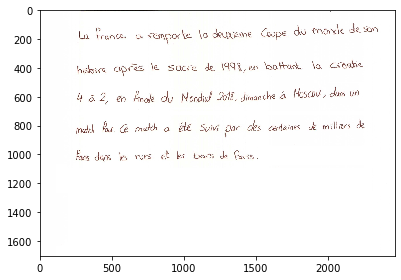

In [78]:
directory = "Line_Segments"
if not os.path.exists(directory):
    os.makedirs(directory)
image = cv2.imread('test.png') 

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
edged = cv2.Canny(gray, 30, 200) 
lst=edged.sum(axis=1)
x1=lst[650]
for i in range(651,850):
    if lst[i]>x1:
        x1=i
        
x2=lst[2000]
for i in range(2000,2800):
    if lst[i]>x2:
        x2=i
print(x1)
print(x2)
cv2.imwrite('out.png', image[x1:x2,:])
io.imshow(image[x1:x2,:])

image = cv2.imread('out.png')

#grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

#binary
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
#dilation
kernel = np.ones((5,100), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)

#find contours
ctrs, hier = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
height = 0
weidth = 0
#sort contours
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
mask = np.zeros(image.shape, dtype=np.uint8) * 255
shapes = []
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)  
    # Getting ROI
    roi = image[y:y+h, x:x+w]
    shapes.append(roi.shape)
    cv2.imwrite("Line_Segments/"+str(i)+'.png',roi)
    height+=h
    weidth+=w  
    # show ROI
    #cv2.rectangle(image,(x,y),( x + w, y + h ),(90,0,255),2)
    mask[y:y+h, x:x+w] = image[y:y+h, x:x+w]
# write
cv2.imwrite('out1.png', mask)
cv2.waitKey(0) 